<h1>Full Network 

In [2]:
import sys
sys.path.extend(['/home/abd/blah/lib/python3.6/site-packages'])

In [119]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import operator

In [7]:
g=nx.read_gexf('data/wordNetwork.gexf')

In [8]:
nx.number_connected_components(g)

1

In [ ]:
nx.average_shortest_path_length()

288538

In [44]:
nx.density(g)

4.5963354388412476e-05

In [46]:
nx.average_clustering(g)

0.17137005124432445

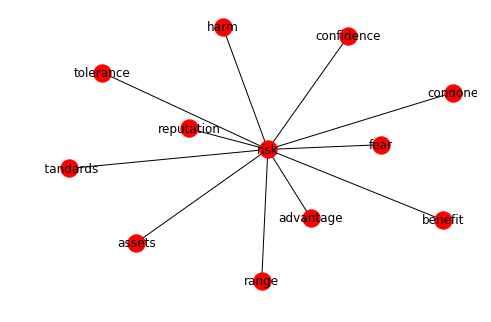

In [72]:
ego = nx.ego_graph(g, 'risk') # ego network of the node 0
nx.draw(ego, with_labels=True)
plt.show()

In [57]:
nx.number_connected_components(g)

1

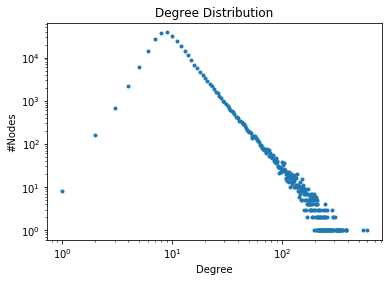

In [70]:
hist = nx.degree_histogram(g)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

In [73]:
nx.write_gexf(g, "wordNetwork.gexf") 

<h1>Trimmed Network

In [233]:
gt=nx.read_gexf('wordNet.gexf')

In [29]:
nx.number_connected_components(gt)

8546

In [111]:
#get the list of connected components and thier lengths

In [46]:
ccList=[x for x in nx.connected_component_subgraphs(gt)]

In [58]:
lenList=[len(x) for x in ccList[:]]

In [103]:
max(lenList[355:])

9

In [104]:
lenList.index(9)

689

In [268]:
for items in ccList[0].nodes:
    temp=nltk.pos_tag([items])
    posList.append(temp[0][1])

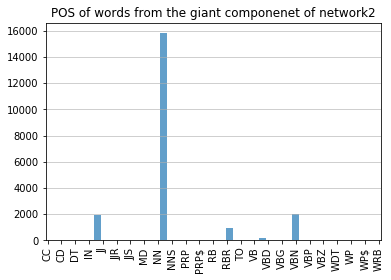

In [269]:
plt.hist(posList, orientation='vertical', alpha=0.7, rwidth=0.2)
plt.title("POS of words from the giant componenet of network2")
plt.xticks(rotation='vertical')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [105]:
posList=[]
for items in ccList[689].nodes:
    temp=nltk.pos_tag([items])
    posList.append(temp[0][1])

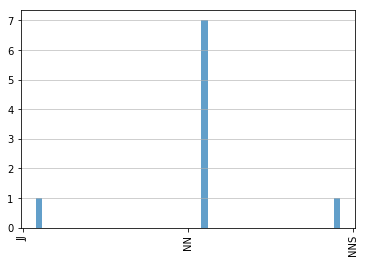

In [106]:
plt.hist(posList, orientation='vertical', alpha=0.7, rwidth=0.2)
plt.xticks(rotation='vertical')
plt.grid(axis='y', alpha=0.75)
plt.show()

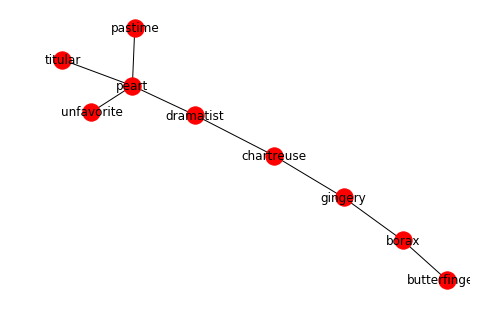

In [108]:
nx.draw(ccList[689], with_labels=True)

plt.show()

In [83]:
print("Edges:", gt.number_of_edges(), "Nodes:", gt.number_of_nodes())

Edges: 52574 Nodes: 31458


In [84]:
nx.density(gt)

0.00010625579035597959

In [85]:
nx.average_clustering(gt)

0.06551401118290386

In [110]:
nx.diameter(ccList[0]) #since the graph is not connected, compute the diameter of the largest connected component(giant)

29

In [ ]:
shortestPathLength=nx.average_shortest_path_length(ccList[0], weight=None)

In [115]:
shortestPathLength

7.611828276519423

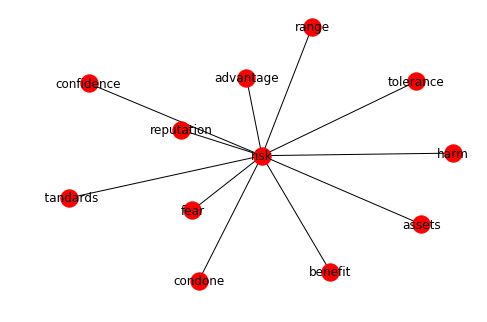

In [86]:
ego = nx.ego_graph(g, 'risk') # ego network of the node 0
nx.draw(ego, with_labels=True)
plt.show()

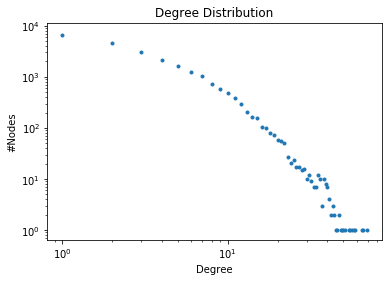

In [97]:
hist = nx.degree_histogram(gt)
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

<h1> E-R random graphs

In [89]:
er = nx.erdos_renyi_graph(31458, 0.05)

In [ ]:
nx.density(er)

In [ ]:
clust=nx.average_clustering(er)

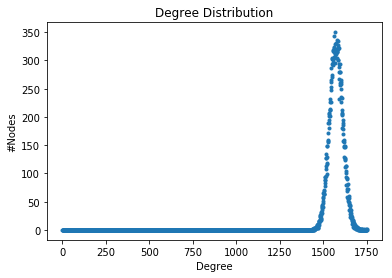

In [90]:
hist = nx.degree_histogram(er)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.show()

<h1>B-A graphs

In [93]:
ba = nx.barabasi_albert_graph(31458, 4)

In [98]:
nx.density(ba)

0.0002542830775559769

In [100]:
nx.average_clustering(ba)

0.002763352724831431

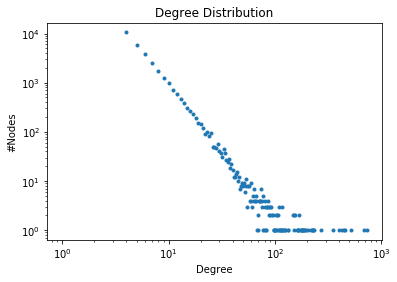

In [94]:
hist = nx.degree_histogram(ba)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

<h1>Path analysis

In [117]:
degreeCentrality=nx.degree_centrality(gt)

In [135]:
eigenCentrality=nx.eigenvector_centrality(gt)

In [ ]:
bwCentrality=nx.betweenness_centrality(gt)

In [143]:
def getKeys(list_):
    return [x[0] for x in list_]

In [305]:
def getAvgPath(gr):
    """Compute and return average shortest path length"""
    giant = max(nx.connected_component_subgraphs(gt), key=len)
    diameter=nx.diameter(giant, e=None)
    numEdges=gr.number_of_edges()
    numNodes=gr.number_of_nodes()
    len_=nx.average_shortest_path_length(giant)

    return (numNodes, numEdges, diameter, len_)

In [313]:
def dropAndCompute(graph, centralityDict, topn=20, iterations=5):
    """Drops top nodes by given centrality index and returns the list of changes in number of connected components and average shortest path length."""
    print("getting candidates")
    candidates=getKeys(sorted(centralityDict.items(), key=operator.itemgetter(1), reverse=True)[:topn*iterations])
    connectedComponents=[]
    nodesEdgesDiameterAvg=[]
    for i in range(1, iterations+1):
        print(i*topn)
        graph.remove_nodes_from(candidates[:i*topn])
        connectedComponents.append(nx.number_connected_components(graph))
        nodesEdgesDiameterAvg.append(getAvgPath(graph))
    return connectedComponents, nodesEdgesDiameterAvg

In [ ]:
bwConnected, infoTuple=dropAndCompute(gt.copy(), bwCentrality, topn=20, iterations=5)

getting candidates
20


In [310]:
bwConnected

[8577, 8583, 8585, 8588, 8591]

In [ ]:
infoTuple

In [ ]:
eigenConnected, infoTupleEigen=dropAndCompute(gt.copy(), bwCentrality, topn=20, iterations=5)
eigenConnected

getting candidates
20
40
60


In [ ]:
degreeConnected=dropAndCompute(gt.copy(), degreeCentrality, topn=20, iterations=5)
degreeConnected